# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# Datos

In [2]:
os.chdir(r'C:\Users\User\Documents\desafio_go_bravo')

In [3]:
dados_prestamo = pd.read_csv("datos_prestamo.csv")
dados_prestamo.drop("Unnamed: 0",axis=1,inplace=True)
dados_prestamo['Fecha_registro'] = pd.to_datetime(dados_prestamo['Fecha_registro'])
dados_prestamo['Fecha_contacto'] = pd.to_datetime(dados_prestamo['Fecha_contacto'])
dados_prestamo

,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,2019-02-26 11:00:00,2019-02-27 12:03:00,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,2019-02-27 14:52:00,2019-02-26 07:43:00,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,2019-02-27 08:18:00,2019-02-28 14:27:00,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,2019-02-28 10:00:00,2019-03-01 12:57:00,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,2019-02-26 07:40:00,2019-02-27 16:35:00,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2019-02-27 08:22:00,2019-02-28 13:04:00,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Pablo
553,2019-02-27 10:40:00,2019-02-28 13:10:00,LP002315,Hombre,Si,1,Graduado,No,8300,0.0,152.0,300.0,0.0,Semiurbana,No,NaN
554,2019-02-28 10:32:00,2019-03-01 14:20:00,LP002225,Hombre,Si,2,Graduado,No,5391,0.0,130.0,360.0,1.0,Urabana,Si,Ana
555,2019-02-26 09:48:00,2019-02-27 13:28:00,LP002807,Hombre,Si,2,No Graduado,No,3675,242.0,108.0,360.0,1.0,Semiurbana,Si,Pablo


In [4]:
dados_prestamo['Id'].value_counts()

Id
LP001743    2
LP001205    2
LP001387    2
LP002424    2
LP002738    2
           ..
LP002300    1
LP002606    1
LP002600    1
LP001708    1
LP001664    1
Name: count, Length: 537, dtype: int64

Existem algumas colunas com valores nulos.

In [5]:
dados_prestamo.isnull().sum()

Fecha_registro            0
Fecha_contacto            0
Id                        0
Genero                   12
Casado                    3
Dependientes             13
Educacion                 0
Trabaja_para_el          27
Salario                   0
Salario_Pareja            0
Credito_pedido           21
Plazo_prestamo           13
Historial_crediticio     47
Area_vivienda             0
Estatus_prestamo          0
Asesor_asignado         117
dtype: int64

In [6]:
dados_prestamo.nunique()

Fecha_registro          416
Fecha_contacto          438
Id                      537
Genero                    2
Casado                    2
Dependientes              4
Educacion                 2
Trabaja_para_el           2
Salario                 454
Salario_Pareja          261
Credito_pedido          190
Plazo_prestamo            9
Historial_crediticio      2
Area_vivienda             3
Estatus_prestamo          2
Asesor_asignado           5
dtype: int64

In [7]:
len(dados_prestamo)

557

Não existem valores duplicados como podemos ver abaixo.

In [8]:
dados_prestamo.drop_duplicates(inplace=True);len(dados_prestamo)

557

In [9]:
[dados_prestamo['Fecha_registro'].min(),dados_prestamo['Fecha_registro'].max()]

[Timestamp('2019-02-26 07:00:00'), Timestamp('2019-03-01 16:17:00')]

In [10]:
[dados_prestamo['Fecha_contacto'].min(),dados_prestamo['Fecha_contacto'].max()]

[Timestamp('2019-02-26 07:43:00'), Timestamp('2019-03-01 18:58:00')]

## Eliminando valores nulos

Parte de la información no fue completada por el equipo de crédito. Entonces, debido al hecho de que estos valores faltantes no son el resultado de la aleatoriedad sino más bien un factor que otros datos observados no pueden explicar, decidí eliminarlos.

In [11]:
null_df = dados_prestamo[dados_prestamo.isnull().any(axis=1)]
null_df.head()

,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
1,2019-02-27 14:52:00,2019-02-26 07:43:00,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
3,2019-02-28 10:00:00,2019-03-01 12:57:00,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
7,2019-02-28 10:34:00,2019-03-01 13:43:00,LP002272,Hombre,Si,2,Graduado,No,3276,484.0,135.0,360.0,NaN,Semiurbana,Si,Ana
15,2019-02-28 10:14:00,2019-03-01 15:55:00,LP002448,Hombre,Si,0,Graduado,No,3948,1733.0,149.0,360.0,0.0,Rural,No,NaN
19,2019-02-26 07:21:00,2019-02-27 16:15:00,LP001788,Mujer,No,0,Graduado,Si,3463,0.0,122.0,360.0,NaN,Urabana,Si,Ana


In [12]:
len(null_df)/len(dados_prestamo)

0.38240574506283664

La columna 'Asesor_asignado' no están bien completada, lo que dificulta el análisis, por lo que decides eliminarla.

In [13]:
dados_prestamo.drop('Asesor_asignado',axis=1,inplace=True)

Después de eliminar la columna anterior, la cantidad de valores nulos también cae a lo esperado.

In [14]:
null_df = dados_prestamo[dados_prestamo.isnull().any(axis=1)]
len(null_df)/len(dados_prestamo)

0.21903052064631956

In [15]:
dados_prestamo.dropna(inplace=True);len(dados_prestamo)

435

## Creando variables

Creando una varíable de día para ver cómo se comporta

In [16]:
dados_prestamo['Fecha_registro_day'] = dados_prestamo['Fecha_registro'].dt.day
dados_prestamo['Fecha_contacto_day'] = dados_prestamo['Fecha_contacto'].dt.day
dados_prestamo['Fecha_registro_day']=dados_prestamo['Fecha_registro_day'].astype('object')
dados_prestamo['Fecha_contacto_day']=dados_prestamo['Fecha_contacto_day'].astype('object')

# Análisis descriptivo

C:\Users\User\AppData\Local\Temp\ipykernel_14680\3286708866.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


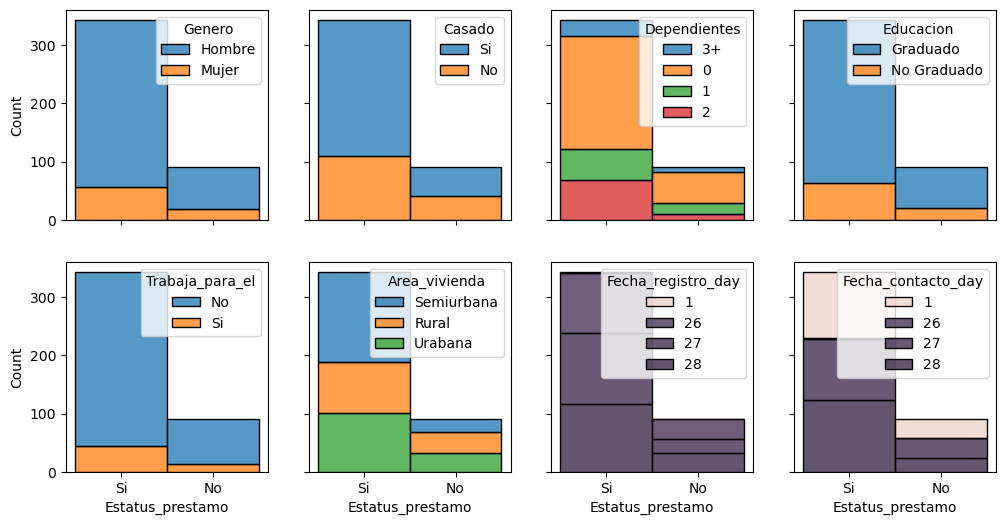

In [17]:
fig,ax = plt.subplots(2,4,sharex=True,sharey=True,figsize=(12,6))
sns.histplot(binwidth = 0.5,x= "Estatus_prestamo", hue = "Genero",data= dados_prestamo,stat='count',multiple='stack',ax=ax[0][0])
sns.histplot(binwidth = 0.5,x= "Estatus_prestamo", hue = "Casado",data= dados_prestamo,stat='count',multiple='stack',ax=ax[0][1])
sns.histplot(binwidth = 0.5,x= "Estatus_prestamo", hue = "Dependientes",data= dados_prestamo,stat='count',multiple='stack',ax=ax[0][2])
sns.histplot(binwidth = 0.5,x= "Estatus_prestamo", hue = "Educacion",data= dados_prestamo,stat='count',multiple='stack',ax=ax[0][3])
sns.histplot(binwidth = 0.5,x= "Estatus_prestamo", hue = "Trabaja_para_el",data= dados_prestamo,stat='count',multiple='stack',ax=ax[1][0])
sns.histplot(binwidth = 0.5,x= "Estatus_prestamo", hue = "Area_vivienda",data= dados_prestamo,multiple='stack',ax=ax[1][1])
sns.histplot(binwidth = 0.5,x= "Estatus_prestamo", hue = "Fecha_registro_day",data= dados_prestamo,multiple='stack',ax=ax[1][2])
sns.histplot(binwidth = 0.5,x= "Estatus_prestamo", hue = "Fecha_contacto_day",data= dados_prestamo,multiple='stack',ax=ax[1][3])

fig.show()

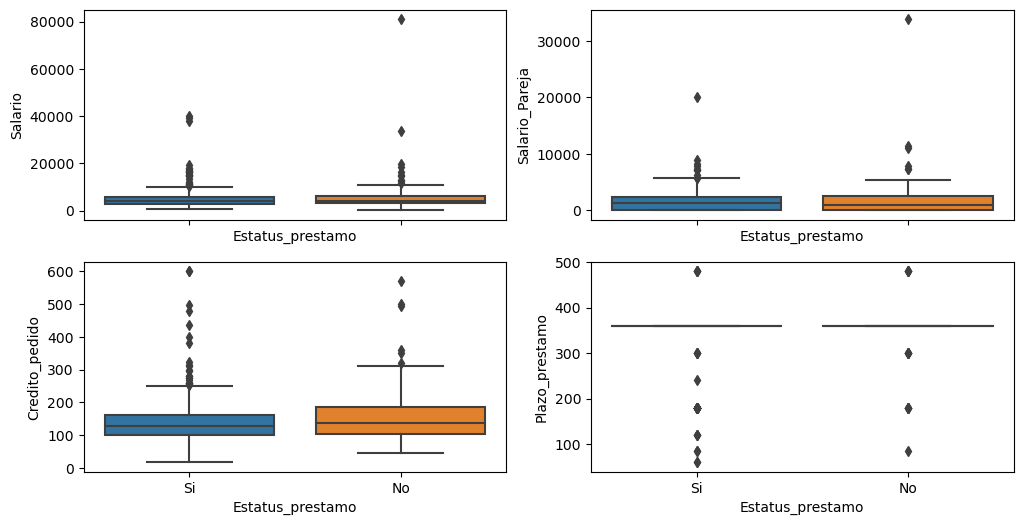

In [18]:
fig2,ax = plt.subplots(2,2,sharex=True, figsize=(12,6))
sns.boxplot(data=dados_prestamo,x="Estatus_prestamo",y="Salario",ax=ax[0][0])
sns.boxplot(data=dados_prestamo,x="Estatus_prestamo",y="Salario_Pareja",ax=ax[0][1])
sns.boxplot(data=dados_prestamo,x="Estatus_prestamo",y="Credito_pedido", ax=ax[1][0])
sns.boxplot(data=dados_prestamo,x="Estatus_prestamo",y="Plazo_prestamo", ax=ax[1][1])
#sns.stripplot(data=dados_prestamo,x="Estatus_prestamo",y="Historial_crediticio", kind="bar",height=1.2, aspect=4)

plt.show()


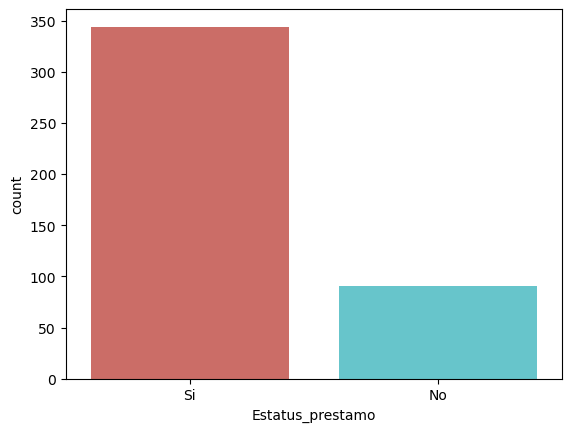

In [19]:
sns.countplot(x='Estatus_prestamo',data=dados_prestamo,palette='hls')
plt.show()

In [20]:
concedido = len(dados_prestamo[dados_prestamo['Estatus_prestamo']=="Si"])/len(dados_prestamo)
no_concedido = len(dados_prestamo[dados_prestamo['Estatus_prestamo']=="No"])/len(dados_prestamo)

print("Porcentaje de crédito concedido",concedido*100)
print("Porcentaje de crédito no concedido",no_concedido*100)

Porcentaje de crédito concedido 79.08045977011494
Porcentaje de crédito no concedido 20.919540229885058


# gráfico de correlación

## Variables continuas

<Axes: >

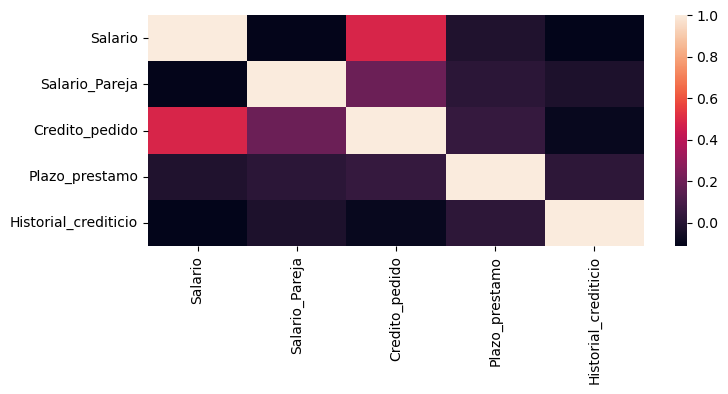

In [21]:
cormat_cont = dados_prestamo[['Salario','Salario_Pareja','Credito_pedido','Plazo_prestamo','Historial_crediticio']].corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(cormat_cont)

## variables categóricas

In [22]:
aux_cat = dados_prestamo.select_dtypes(include='object').copy()
aux_cat.drop(['Id'],axis=1,inplace=True)
aux_cat

,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Area_vivienda,Estatus_prestamo,Fecha_registro_day,Fecha_contacto_day
0,Hombre,Si,3+,Graduado,No,Semiurbana,Si,26,27
2,Mujer,No,0,Graduado,No,Semiurbana,Si,27,28
4,Mujer,Si,0,Graduado,No,Semiurbana,Si,26,27
5,Mujer,Si,0,Graduado,No,Semiurbana,Si,27,28
6,Mujer,Si,0,Graduado,No,Semiurbana,Si,27,28
...,...,...,...,...,...,...,...,...,...
552,Mujer,Si,0,Graduado,No,Semiurbana,Si,27,28
553,Hombre,Si,1,Graduado,No,Semiurbana,No,27,28
554,Hombre,Si,2,Graduado,No,Urabana,Si,28,1
555,Hombre,Si,2,No Graduado,No,Semiurbana,Si,26,27


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,aux_cat.shape[1]):
    if aux_cat.dtypes[i]=='object':
        aux_cat[aux_cat.columns[i]] = le.fit_transform(aux_cat[aux_cat.columns[i]])

In [24]:
cormat_cat = aux_cat.corr(method='spearman')

<Axes: >

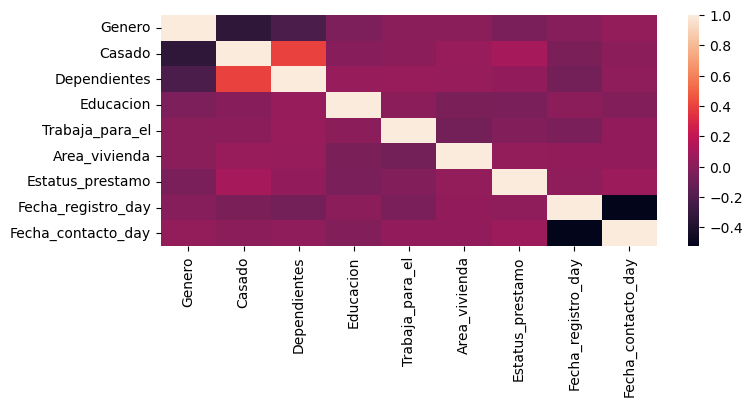

In [25]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(cormat_cat)

## categóricas y continuas 

In [26]:
dados_prestamo['Estatus_prestamo'] = le.fit_transform(dados_prestamo['Estatus_prestamo'])

In [27]:
corr_df_bisec = dados_prestamo[['Salario','Salario_Pareja','Credito_pedido','Plazo_prestamo','Historial_crediticio']].corrwith(dados_prestamo['Estatus_prestamo'].astype(float),method=stats.pointbiserialr)

In [28]:
corr_df_bisec

,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio
0,-0.090325,-0.084997,-0.126239,-0.051657,5.399372e-01
1,0.059794,0.076583,0.008392,0.282372,2.773442e-34


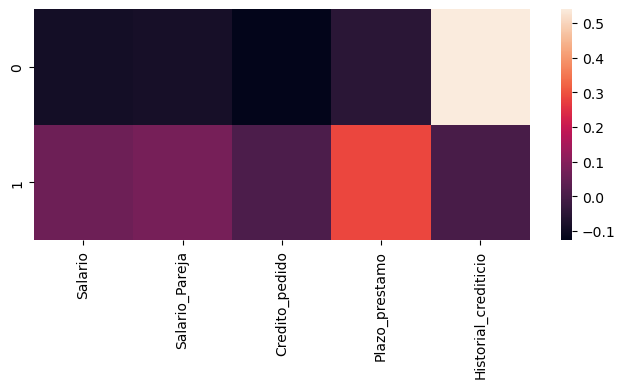

In [29]:
fig,ax = plt.subplots(figsize=(8,3))
sns.heatmap(corr_df_bisec)
plt.show()

Antes de continuar, es importante hacer algunas observaciones.
- los datos están desequilibrados;
- las variables con mayor correlación con la variables respuesta, y por lo tanto parecen buenos predictores, son Plazo_prestamo y Casado;
- el promedio de la variable Credito_pedido es mayor para el grupo que el crédito no fue aprobado;

# Modelado

## Creando dummy variables 

In [30]:
aux_cat.columns

Index(['Genero', 'Casado', 'Dependientes', 'Educacion', 'Trabaja_para_el',
       'Area_vivienda', 'Estatus_prestamo', 'Fecha_registro_day',
       'Fecha_contacto_day'],
      dtype='object')

In [31]:
cat_vars = ['Historial_crediticio','Genero', 'Casado', 'Dependientes', 'Educacion', 'Trabaja_para_el','Area_vivienda', 'Fecha_registro_day',
            'Fecha_contacto_day']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dados_prestamo[var], prefix=var)
    data1=dados_prestamo.join(cat_list)
    dados_prestamo=data1
cat_vars=['Historial_crediticio','Genero', 'Casado', 'Dependientes', 'Educacion', 'Trabaja_para_el','Area_vivienda', 'Fecha_registro_day',
            'Fecha_contacto_day']
data_vars=dados_prestamo.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


Las variables finales son

In [32]:
data_final=dados_prestamo[to_keep]
data_final.drop(['Fecha_registro','Fecha_contacto','Id'],axis=1,inplace=True)
data_final.columns.values

C:\Users\User\AppData\Local\Temp\ipykernel_14680\425477872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop(['Fecha_registro','Fecha_contacto','Id'],axis=1,inplace=True)


array(['Salario', 'Salario_Pareja', 'Credito_pedido', 'Plazo_prestamo',
       'Estatus_prestamo', 'Historial_crediticio_0.0',
       'Historial_crediticio_1.0', 'Genero_Hombre', 'Genero_Mujer',
       'Casado_No', 'Casado_Si', 'Dependientes_0', 'Dependientes_1',
       'Dependientes_2', 'Dependientes_3+', 'Educacion_Graduado',
       'Educacion_No Graduado', 'Trabaja_para_el_No',
       'Trabaja_para_el_Si', 'Area_vivienda_Rural',
       'Area_vivienda_Semiurbana', 'Area_vivienda_Urabana',
       'Fecha_registro_day_1', 'Fecha_registro_day_26',
       'Fecha_registro_day_27', 'Fecha_registro_day_28',
       'Fecha_contacto_day_1', 'Fecha_contacto_day_26',
       'Fecha_contacto_day_27', 'Fecha_contacto_day_28'], dtype=object)

In [33]:
X = data_final.loc[:, data_final.columns != 'Estatus_prestamo']
y = data_final.loc[:, data_final.columns == 'Estatus_prestamo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X = pd.DataFrame(data=X,columns=columns )
os_data_y= pd.DataFrame(data=y,columns=['Estatus_prestamo'])

## Recursive feature elimination

In [34]:
data_final_vars=data_final.columns.values.tolist()
y=['Estatus_prestamo']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,step= 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True  True False  True  True  True  True
  True False  True False  True False  True  True False False False  True
 False False False False  True]
[2 2 2 2 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 2 1 2 2 2 2 1]


In [35]:
X

['Salario',
 'Salario_Pareja',
 'Credito_pedido',
 'Plazo_prestamo',
 'Historial_crediticio_0.0',
 'Historial_crediticio_1.0',
 'Genero_Hombre',
 'Genero_Mujer',
 'Casado_No',
 'Casado_Si',
 'Dependientes_0',
 'Dependientes_1',
 'Dependientes_2',
 'Dependientes_3+',
 'Educacion_Graduado',
 'Educacion_No Graduado',
 'Trabaja_para_el_No',
 'Trabaja_para_el_Si',
 'Area_vivienda_Rural',
 'Area_vivienda_Semiurbana',
 'Area_vivienda_Urabana',
 'Fecha_registro_day_1',
 'Fecha_registro_day_26',
 'Fecha_registro_day_27',
 'Fecha_registro_day_28',
 'Fecha_contacto_day_1',
 'Fecha_contacto_day_26',
 'Fecha_contacto_day_27',
 'Fecha_contacto_day_28']

La técnica de eliminación das features nos ayudó a selecionar las seguientes variables  'Historial_crediticio','Genero_Hombre','Casado_Si','Dependientes_0','Dependientes_1','Dependientes_2','Educacion_Graduado',
 'Educacion_No Graduado','Trabaja_para_el_No','Area_vivienda_Rural','Area_vivienda_Semiurbana','Area_vivienda_Urabana', 'Fecha_registro_day_27','Fecha_contacto_day_28'

In [36]:
cols=['Historial_crediticio_0.0','Historial_crediticio_1.0','Genero_Hombre','Casado_Si','Dependientes_0','Dependientes_1','Dependientes_2','Educacion_Graduado',
 'Educacion_No Graduado','Trabaja_para_el_No','Area_vivienda_Rural','Area_vivienda_Semiurbana','Area_vivienda_Urabana', 'Fecha_registro_day_27','Fecha_contacto_day_28'] 
X=os_data_X[cols]
y=os_data_y['Estatus_prestamo']

## implementando el modelo

In [37]:
X

,Historial_crediticio_0.0,Historial_crediticio_1.0,Genero_Hombre,Casado_Si,Dependientes_0,Dependientes_1,Dependientes_2,Educacion_Graduado,Educacion_No Graduado,Trabaja_para_el_No,Area_vivienda_Rural,Area_vivienda_Semiurbana,Area_vivienda_Urabana,Fecha_registro_day_27,Fecha_contacto_day_28
0,False,True,True,True,False,False,False,True,False,True,False,True,False,False,False
2,False,True,False,False,True,False,False,True,False,True,False,True,False,True,True
4,False,True,False,True,True,False,False,True,False,True,False,True,False,False,False
5,False,True,False,True,True,False,False,True,False,True,False,True,False,True,True
6,False,True,False,True,True,False,False,True,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,False,True,False,True,True,False,False,True,False,True,False,True,False,True,True
553,True,False,True,True,False,True,False,True,False,True,False,True,False,True,True
554,False,True,True,True,False,False,True,True,False,True,False,False,True,False,False
555,False,True,True,True,False,False,True,False,True,True,False,True,False,False,False


In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.370193
         Iterations 9
                                      Results: Logit
Model:                       Logit                    Method:                   MLE       
Dependent Variable:          Estatus_prestamo         Pseudo R-squared:         0.278     
Date:                        2024-01-16 18:23         AIC:                      348.0675  
No. Observations:            435                      BIC:                      401.0470  
Df Model:                    12                       Log-Likelihood:           -161.03   
Df Residuals:                422                      LL-Null:                  -223.11   
Converged:                   1.0000                   LLR p-value:              9.1889e-21
No. Iterations:              9.0000                   Scale:                    1.0000    
------------------------------------------------------------------------------------------
                          

## Ajuste del modelo de regresión logística

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Validación

## Predicir en el grupo de prueba y calculaar la precisión

In [40]:
y_pred = logreg.predict(X_test)
print('Precisión en el modelo de regresión en el grupo de prueba: {:.2f}'.format(logreg.score(X_test, y_test)))

Precisión en el modelo de regresión en el grupo de prueba: 0.85


## Matriz de confusión

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 11  16]
 [  4 100]]


El resultado anterior nos dice que tenemos 100+11 (111) predicciones correctas y 16+4 (20) predicciones incorrectas.

## Calcular la precisión, recall, f-measure y support

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.41      0.52        27
           1       0.86      0.96      0.91       104

    accuracy                           0.85       131
   macro avg       0.80      0.68      0.72       131
weighted avg       0.84      0.85      0.83       131



## Curva ROC

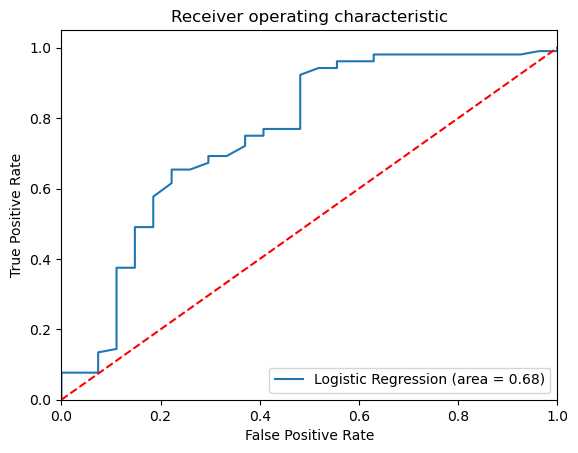

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()